In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

In [2]:
from gammapy.image.models import SkyGaussian, SkyDisk
from gammapy.maps import Map
from gammapy.image import measure_image_moments

Simulate a disk morphology:

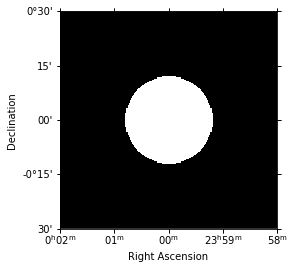

In [3]:
r_0 = 0.2 * u.deg
disk = SkyDisk("0 deg", "0 deg", r_0)
map_disk = Map.create(skydir=(0, 0), width=1, binsz=0.005)

coords = map_disk.geom.get_coord()
solid_angle = map_disk.geom.solid_angle()

map_disk.data = (disk(coords["lon"] * u.deg, coords["lat"] * u.deg) * solid_angle).to_value("")
map_disk.plot();

Compute image moments:

In [4]:
A, x, y, x_rms, y_rms, xy_rms = measure_image_moments(map_disk)

The RMS width (which is equivalent to the sigma obtained by fitting a Gaussian morphology) of the disk comes out at:

In [5]:
print(x_rms)

0.09997334994175135 deg


The width parameter in Fermipy is defined as the 68% containment radius of the spatial model. To convert to the disk radius and / or Gaussian sigma we do the following:

In [6]:
def width_disk(radius):
    return np.sqrt(0.68) * radius

In [7]:
def width_gauss(sigma):
    return sigma * np.sqrt(2 * np.log(1 / (1 - 0.68)))

In [8]:
width_disk(r_0) / width_gauss(x_rms)

<Quantity 1.0927997>

Which correspondss to the ratio, that Faical obtained from his fit.